In [2]:
import sys
sys.path
#crdit goes to Udacity course for this project and other online resources


['',
 '/Users/dny/anaconda/lib/python27.zip',
 '/Users/dny/anaconda/lib/python2.7',
 '/Users/dny/anaconda/lib/python2.7/plat-darwin',
 '/Users/dny/anaconda/lib/python2.7/plat-mac',
 '/Users/dny/anaconda/lib/python2.7/plat-mac/lib-scriptpackages',
 '/Users/dny/anaconda/lib/python2.7/lib-tk',
 '/Users/dny/anaconda/lib/python2.7/lib-old',
 '/Users/dny/anaconda/lib/python2.7/lib-dynload',
 '/Users/dny/anaconda/lib/python2.7/site-packages',
 '/Users/dny/anaconda/lib/python2.7/site-packages/Sphinx-1.5.4-py2.7.egg',
 '/Users/dny/anaconda/lib/python2.7/site-packages/aeosa',
 '/Users/dny/anaconda/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg',
 '/Users/dny/anaconda/lib/python2.7/site-packages/IPython/extensions',
 '/Users/dny/.ipython']

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets,svm,cross_validation,tree,preprocessing,metrics
import sklearn.ensemble as ske


In [13]:
tit_df=pd.read_excel('/Users/dny/Downloads/train1.xls','train1',index_col=None,na_values=['NA'])


In [14]:
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:

class_sex_group=tit_df.groupby(['Pclass','Sex']).mean()
class_sex_group

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

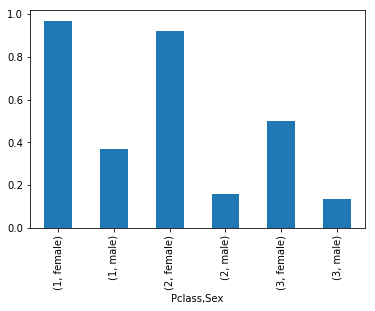

In [33]:
class_sex_group['Survived'].plot.bar()

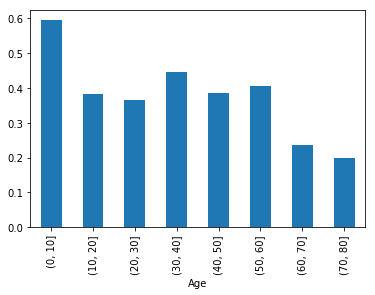

In [34]:
group_by_age=pd.cut(tit_df["Age"],np.arange(0,90,10))
age_grouping=tit_df.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [35]:
tit_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [43]:
tit_df=tit_df.dropna()
tit_df.count()


PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
dtype: int64

In [64]:
def preprocess_tit_df(df):
    pre_df=df.copy()
    le=preprocessing.LabelEncoder()
    pre_df.Sex=le.fit_transform(pre_df.Sex)
    pre_df.Embarked = le.fit_transform(pre_df.Embarked)
    pre_df=pre_df.drop(['Name','Ticket'],axis=1)
    return pre_df

pre_df=preprocess_tit_df(tit_df)
pre_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [65]:
x=pre_df.drop(['Survived'],axis=1).values
y=pre_df['Survived'].values


In [66]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)

In [73]:
clf_dt=tree.DecisionTreeClassifier(max_depth=10)

In [74]:
clf_dt.fit(X_train, y_train)
clf_dt.score (X_test, y_test)

0.72027972027972031

In [76]:
shuffle_validator = cross_validation.ShuffleSplit(len(x), n_iter=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, x, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [77]:
test_classifier(clf_dt)

Accuracy: 0.7657 (+/- 0.03)


In [78]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.8126 (+/- 0.03)


In [79]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8217 (+/- 0.03)


In [80]:
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)

Accuracy: 0.8203 (+/- 0.03)
